In [93]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [107]:
targets = ['contract_num', 'advertiser', 'flight_from', 'flight_to', 'gross_amount']

In [94]:
df = pd.read_csv('../../data/data_analytics.tsv', '\t')
df = df.drop('Unnamed: 0', axis = 1)

In [95]:
df.token_count.value_counts()

612     16
362     15
1205    15
683     14
753     14
        ..
3930     1
1899     1
1939     1
1963     1
2101     1
Name: token_count, Length: 2652, dtype: int64

In [96]:
df

,name,token_count,contract_num_maxval,contract_num_total_count,contract_num_maxval_count,contract_num_100perc_count,contract_num_75perc_count,contract_num_50perc_count,contract_num_total_distinct_count,contract_num_maxval_distinct_count,...,gross_amount_total_count,gross_amount_maxval_count,gross_amount_100perc_count,gross_amount_75perc_count,gross_amount_50perc_count,gross_amount_total_distinct_count,gross_amount_maxval_distinct_count,gross_amount_100perc_distinct_count,gross_amount_75perc_distinct_count,gross_amount_50perc_distinct_count
0,414543-wcpo-tv-collect-files-59438-political-f...,3343,0.0,0,0,0,0,0,0,0,...,620,1,1,2,551,86,1,1,4,71
1,414565-wcpo-tv-collect-files-59438-political-f...,783,0.0,0,0,0,0,0,0,0,...,105,2,2,8,95,24,1,1,4,20
2,414581-wcpo-tv-collect-files-59438-political-f...,362,0.0,0,0,0,0,0,0,0,...,38,4,4,9,35,17,1,1,6,16
3,414585-wcpo-tv-collect-files-59438-political-f...,460,0.0,0,0,0,0,0,0,0,...,57,4,4,7,53,17,1,1,4,15
4,414586-wcpo-tv-collect-files-59438-political-f...,944,0.0,0,0,0,0,0,0,0,...,147,2,2,19,141,32,1,1,5,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,536257-wwj-geoffrey-fieger-attorney-x-issue-or...,233,0.0,0,0,0,0,0,0,0,...,16,6,6,7,15,10,1,1,2,9
8986,536259-wwj-geoffrey-fieger-attorney-x-issue-or...,155,0.0,0,0,0,0,0,0,0,...,22,4,4,4,21,7,1,1,1,6
8987,536260-wwj-geoffrey-fieger-attorney-x-issue-or...,233,0.0,0,0,0,0,0,0,0,...,16,6,6,7,15,10,1,1,2,9
8988,536390-wwj-geoffrey-fieger-attorney-x-issue-or...,155,0.0,0,0,0,0,0,0,0,...,22,4,4,4,22,7,1,1,1,7


Text(0, 0.5, 'Wahrscheinlichkeit')

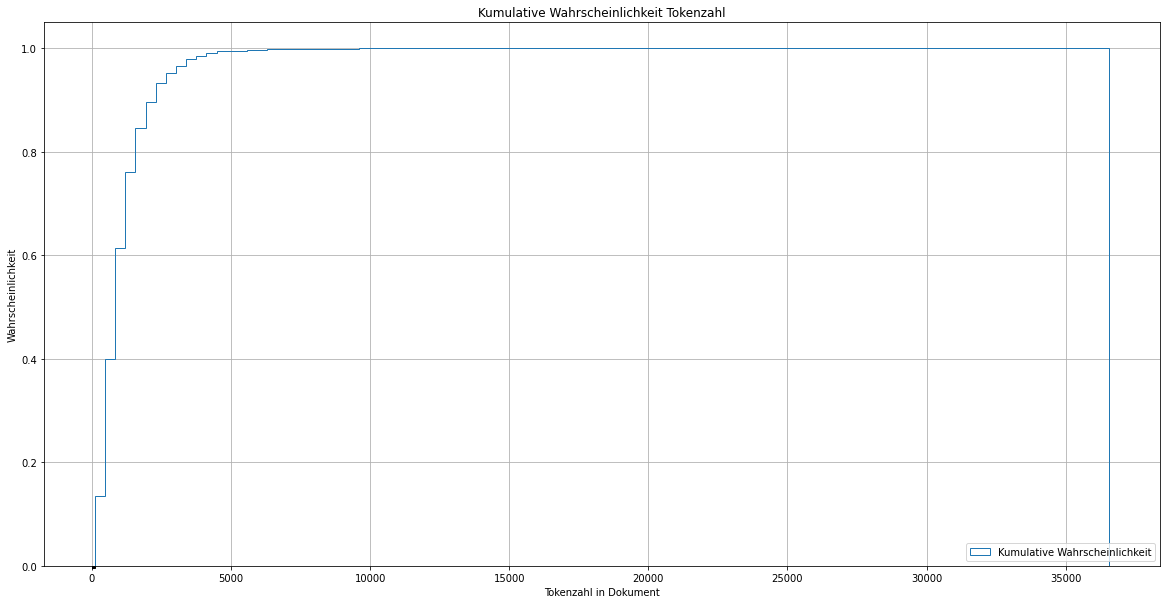

In [132]:
 # plot the cumulative histogram
fig, ax = plt.subplots(figsize=(20, 10))
n, bins, patches = plt.hist(df.token_count,
                                           100, 
                                           density=True, 
                                           histtype='step',
                                           cumulative=True,
                                           label='Kumulative Wahrscheinlichkeit')
ax.grid(True)
ax.legend(loc='lower right')
ax.set_title('Kumulative Wahrscheinlichkeit Tokenzahl')
ax.set_xlabel('Tokenzahl in Dokument')
ax.set_xticks(ticks = range(0,100), minor=True)
ax.set_ylabel('Wahrscheinlichkeit')


In [133]:
def plot_cumulative_occurences(plot, df, label):
    # plot the cumulative histogram
    n, bins, patches = plot.hist(df[label + '_maxval'] * 100,
                                               100, 
                                               density=True, 
                                               histtype='step',
                                               cumulative=True,
                                               label='Kumulative Wahrscheinlichkeit')
    plot.grid(True)
    plot.legend(loc='lower right')
    plot.set_title('Kumulative Wahrscheinlichkeit "' + label + '"')
    plot.set_xlabel('Label Sicherheit in Dokument')
    plot.set_xticks(ticks = range(0,100), minor=True)
    plot.set_ylabel('Wahrscheinlichkeit')
    return plot


def plot_distinct_label_count_distribution_with_threshhold(plot, df, label):
    bins = df[label + '_50perc_distinct_count'].max() if df[label + '_50perc_distinct_count'].max() > 0 else 10
    plot.hist([df[label + '_100perc_distinct_count'],
                     df[label + '_75perc_distinct_count'],
                     df[label + '_50perc_distinct_count']],
                    color=['tab:blue', 'tab:orange', 'tab:green'],
                    label = ['Mit 1.0 Schwellenwert', 'Mit 0.75 Schwellenwert', 'Mit 0.50 Schwellenwert'],
                    bins = bins)

    plot.grid(True)
    plot.legend(loc='upper right')
    plot.set_title('Absolute Häufigkeit "' + label + '"')
    plot.set_xlabel('Distinkte Token mit Label in Dokument')
    plot.set_xticks(ticks = range(0,bins), minor=True)
    plot.set_ylabel('Absolute Häufigkeit')
    return plot

def plot_distinct_label_count_distribution(plot, df, label):
    bins = df[label + '_maxval_distinct_count'].max() if df[label + '_50perc_distinct_count'].max() > 0 else 10
    plot.hist([df[label + '_maxval_distinct_count'],
               df[label + '_100perc_distinct_count']],
              color=['tab:blue', 'tab:orange'],
              label = ['Mit Maximalwert', 'Mit 1.0 Schwellenwert' ],
              bins = bins)
    plot.grid(True)
    plot.legend(loc='upper right')
    plot.set_title('Maximalwert zu 100% Sicherheit Vergleich "' + label + '"')
    plot.set_xlabel('Distinkte Token mit Label in Dokument')
    plot.set_xticks(ticks = range(0,bins), minor=True)
    plot.set_ylabel('Absolute Häufigkeit')
    return plot

def plot_label_analytics(df, label):
    fig, axes = plt.subplots(3,1, figsize=(20, 30))
    max_val_cumulative = plot_cumulative_occurences(axes[0], df, label)
    label_count_distr_thresh = plot_distinct_label_count_distribution_with_threshhold(axes[1], df, label)
    label_count_distr= plot_distinct_label_count_distribution(axes[2], df, label)
    plt.show()

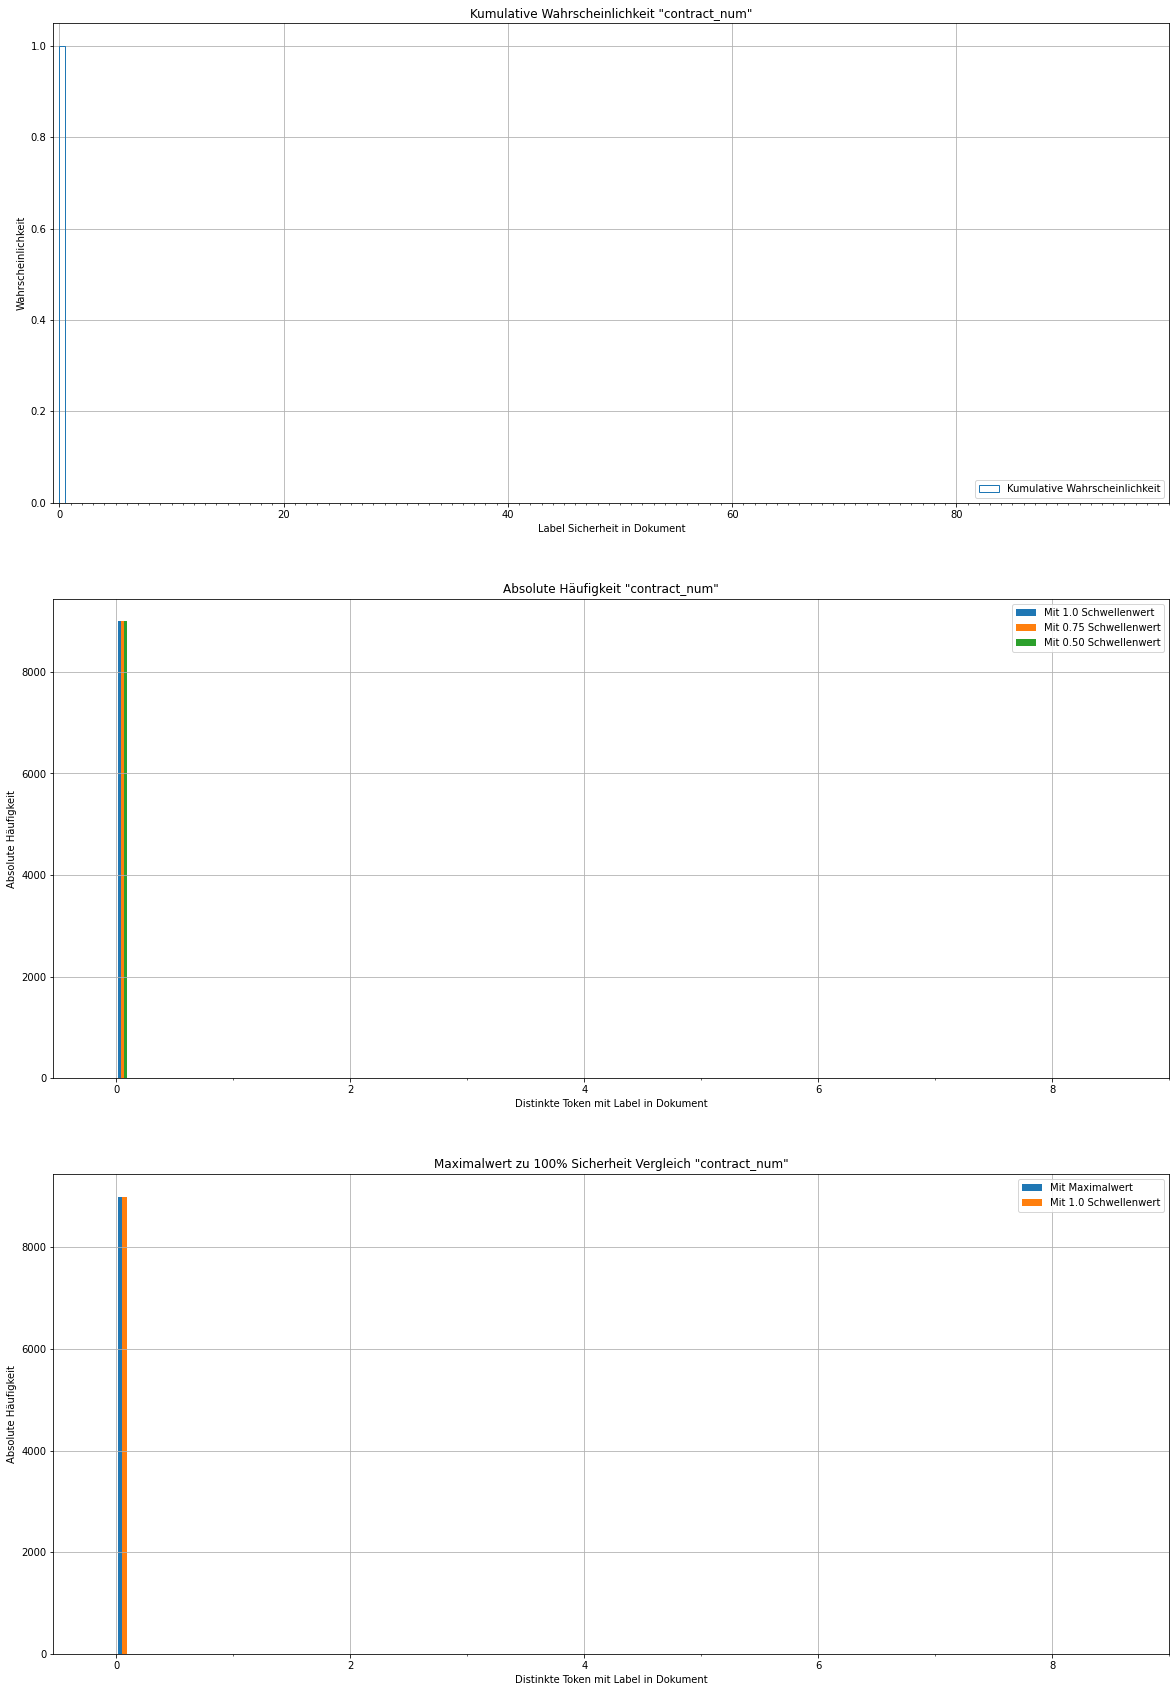

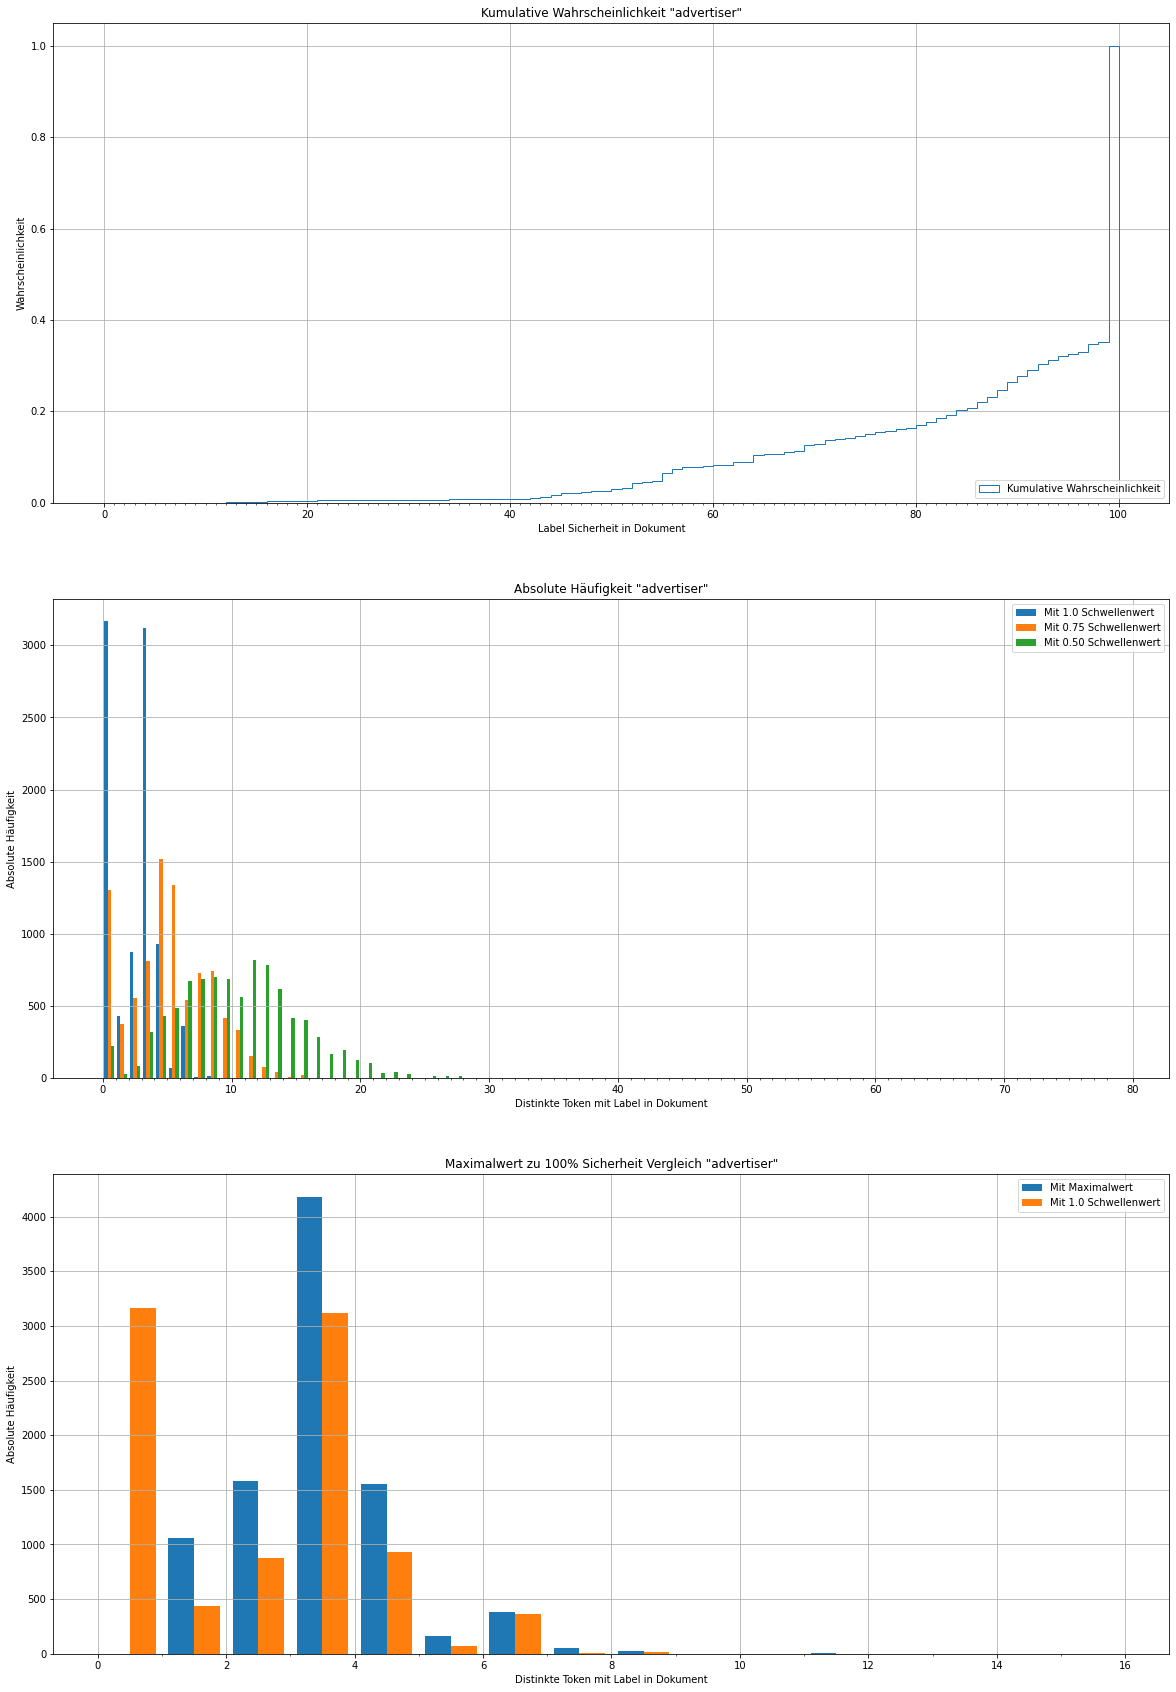

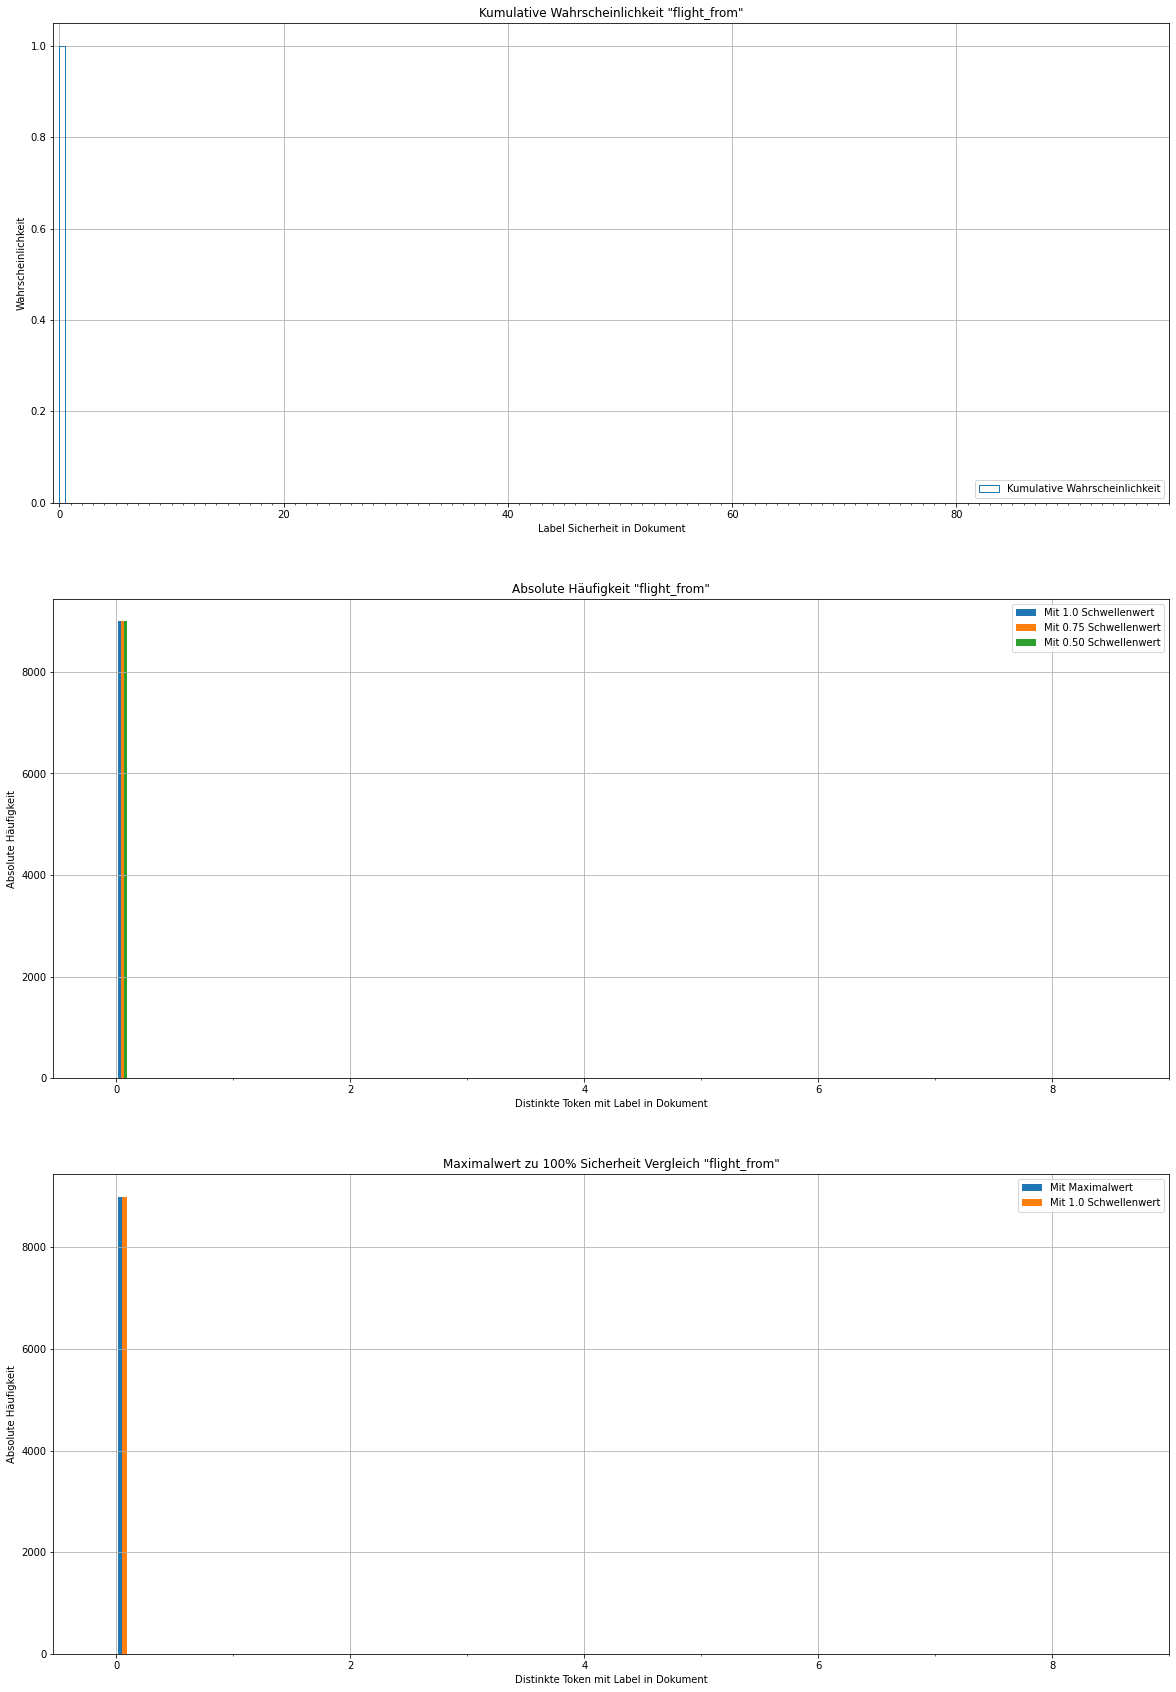

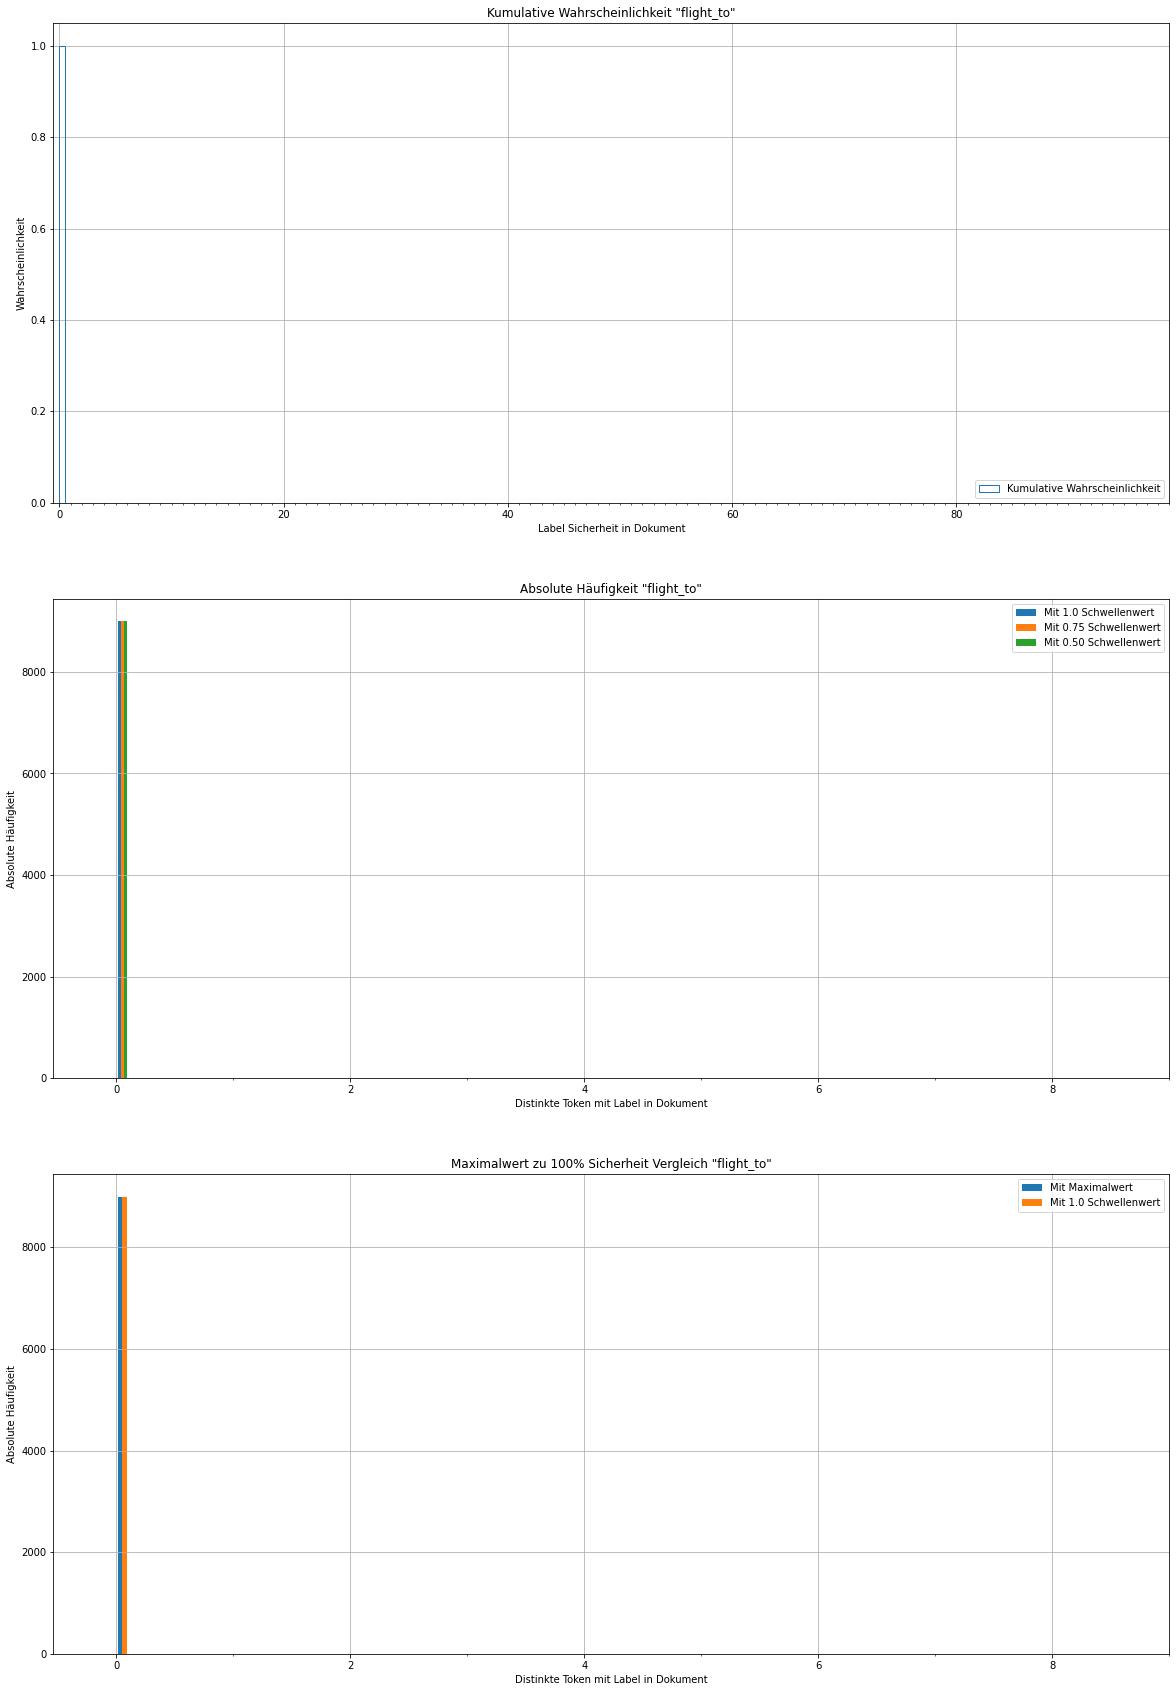

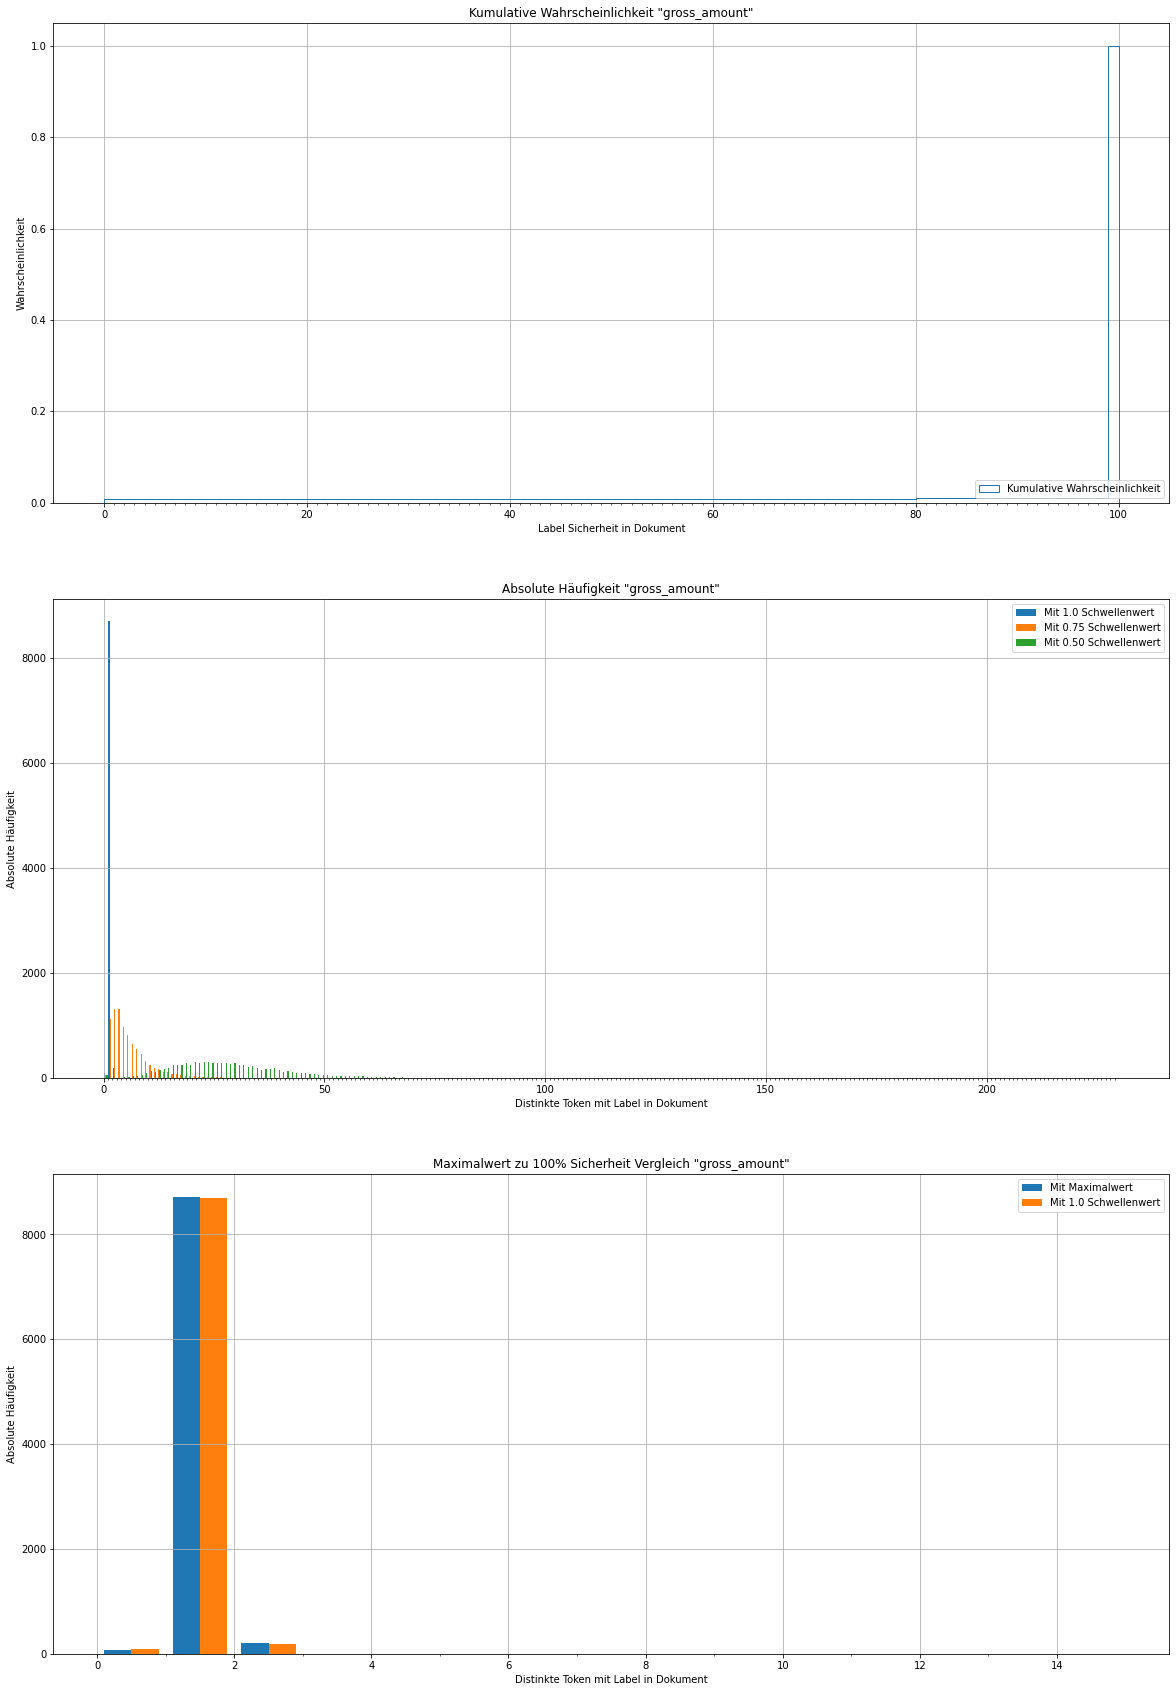

In [134]:
for label in targets:
    plot_label_analytics(df, label)